음악 선곡을 잘해서 대위의 브런치 카페는 대박이 났습니다. 그런데 브런치 카페이다 보니 저녁 시간대에는 가게가 텅텅 빌 수밖에 없죠.
고민 끝에, 저녁에는 가게를 영화 카페로 변신시켜 볼까 하는데요. 우선 수많은 영화 DVD를 어떻게 배치해야 할지 고민입니다. 좀 연관된 장르끼리 묶어서 보관해야, 각 손님들의 취향을 잘 맞출 수 있을 것 같습니다.
이번에도 대박을 위해서 데이터의 도움을 최대한 빌리려고 합니다.
주어진 데이터셋에서 영화 장르에 대한 column은 'Horror'부터 'Action'까지 입니다. 영화 장르에 대해서 clustermap을 그려 보세요.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../data/survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [4]:
# 영화 장르
movie_df = df.loc[:, 'Horror':'Action']
movie_df

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
992,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
993,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0
994,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
995,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


In [6]:
# 상관 관계 구하기
corr = movie_df.corr()
corr

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Horror,1.000000,0.503069,0.098243,-0.128117,0.165834,0.136508,-0.087150,0.004865,-0.063749,0.078845,0.129958
Thriller,0.503069,1.000000,-0.008975,-0.164751,0.230838,0.220754,-0.090075,-0.025239,0.046558,0.124719,0.278214
Comedy,0.098243,-0.008975,1.000000,0.286236,0.040425,-0.077274,0.211025,0.180246,-0.007444,-0.033091,0.121256
Romantic,-0.128117,-0.164751,0.286236,1.000000,-0.097219,-0.193751,0.349432,0.239951,-0.083895,-0.126574,-0.181823
Sci-fi,0.165834,0.230838,0.040425,-0.097219,1.000000,0.274634,-0.009158,0.068642,0.141714,0.276898,0.363429
War,0.136508,0.220754,-0.077274,-0.193751,0.274634,1.000000,-0.072474,-0.026996,0.235355,0.396669,0.299257
Fantasy/Fairy tales,-0.087150,-0.090075,0.211025,0.349432,-0.009158,-0.072474,1.000000,0.679270,0.140227,-0.023267,-0.051591
Animated,0.004865,-0.025239,0.180246,0.239951,0.068642,-0.026996,0.679270,1.000000,0.148375,-0.003069,0.019379
Documentary,-0.063749,0.046558,-0.007444,-0.083895,0.141714,0.235355,0.140227,0.148375,1.000000,0.263859,0.131062
Western,0.078845,0.124719,-0.033091,-0.126574,0.276898,0.396669,-0.023267,-0.003069,0.263859,1.000000,0.320005


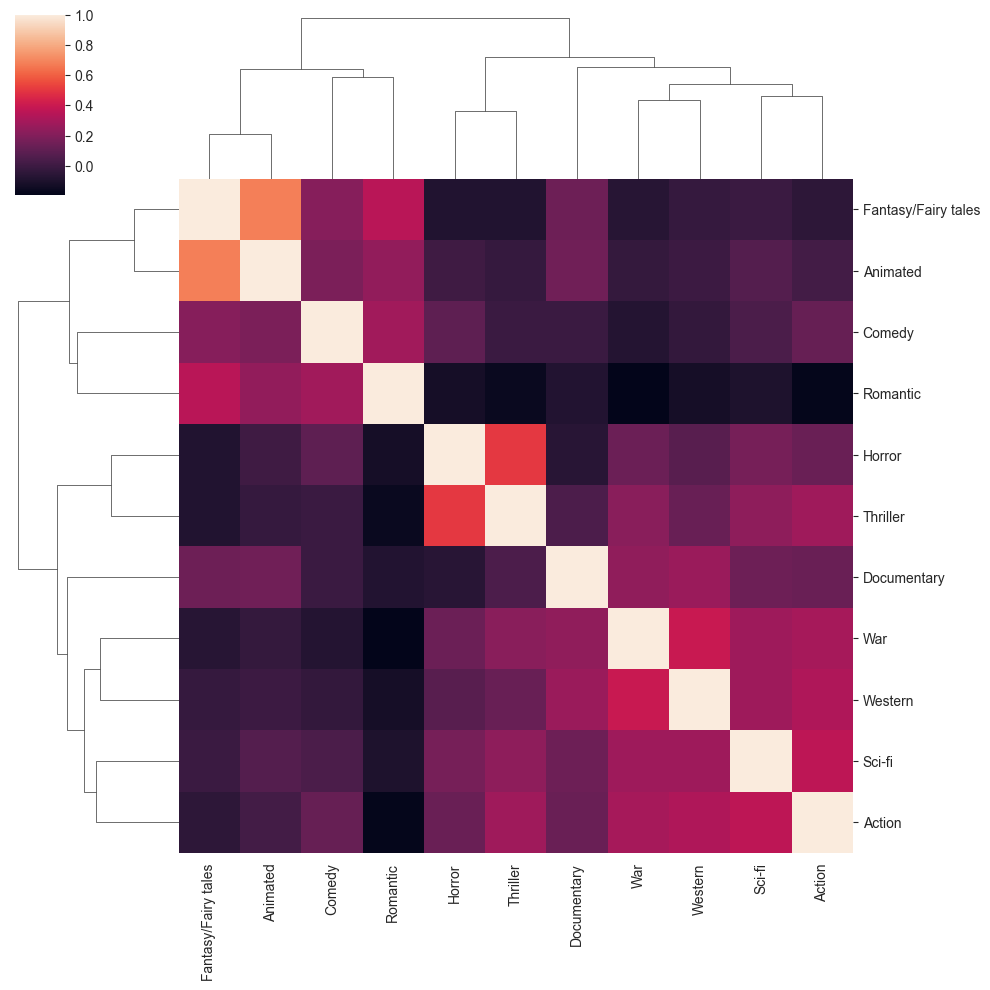

In [7]:
# 클러스터맵 그리기
sns.clustermap(corr)